## Bike Sharing Assignment
#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


#### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


### Loading Data

In [3]:
bk_sharing_data = pd.read_csv("day.csv", index_col = 0)

In [4]:
bk_sharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the data types

In [5]:
bk_sharing_data.shape

(730, 15)

In [6]:
bk_sharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [7]:
bk_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [8]:
bk_sharing_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Converting the columns

In [9]:
### Converting the data types of variables
bk_sharing_data["dteday"] = pd.to_datetime(bk_sharing_data["dteday"], format='%d-%m-%Y')
bk_sharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
## These are categorical variables. One-hot encoding.
bk_sharing_data["season"] = bk_sharing_data["season"].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
bk_sharing_data["weathersit"] = bk_sharing_data["weathersit"].map({1:"clear", 2: "mist", 3: "snow", 4: "rain"})

bk_sharing_data["yr"] = bk_sharing_data["yr"].map({0: "2018", 1: "2019"})
bk_sharing_data["mnth"] = bk_sharing_data["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June", 
                                                       7: "July", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})

# no pre-defined order is given. Assuming 0 - no, 1- yes
bk_sharing_data["holiday"] = bk_sharing_data["holiday"].map({0:"no", 1: "yes"})

In [11]:
## No pre-defined order is given for the variables. Asssuming 0-sun, 1- Mon 2-Tue etc, based on the working day var.
bk_sharing_data["weekday"] = bk_sharing_data["weekday"].map( {1: "mon", 2: "tue", 3: "wed", 
                                                            4: "thu", 5: "fri", 6: "sat", 0: "sun"})
bk_sharing_data["workingday"] = bk_sharing_data["workingday"].map({1:"yes", 0: "no"})

In [12]:
bk_sharing_data.dtypes

dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [13]:
bk_sharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,spring,2018,Jan,no,mon,yes,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,spring,2018,Jan,no,tue,yes,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,spring,2018,Jan,no,wed,yes,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,spring,2018,Jan,no,thu,yes,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,spring,2018,Jan,no,fri,yes,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking Missing Values

In [14]:
bk_sharing_data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Observations** There are no missing values. Hence, no need to impute the same

## Exploratory Data Analysis

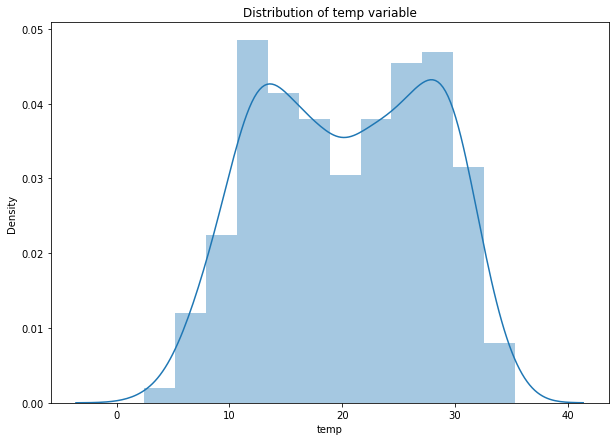

In [15]:
plt.figure(figsize= (10,7))
sns.distplot(bk_sharing_data.temp)
plt.title("Distribution of temp variable")
plt.show()

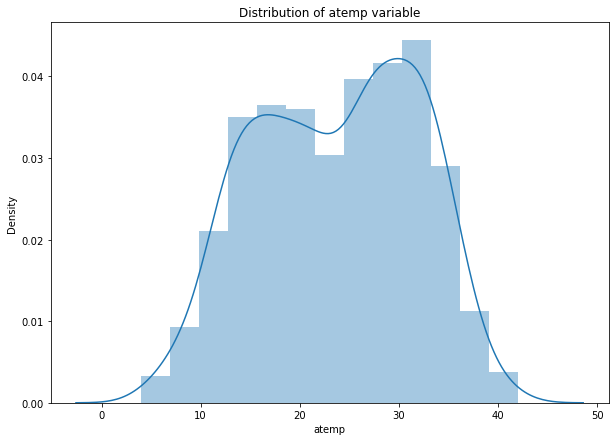

In [16]:
plt.figure(figsize= (10,7))
sns.distplot(bk_sharing_data.atemp)
plt.title("Distribution of atemp variable")
plt.show()

**Observations**: Both temp and atemp approximately have the same distribution

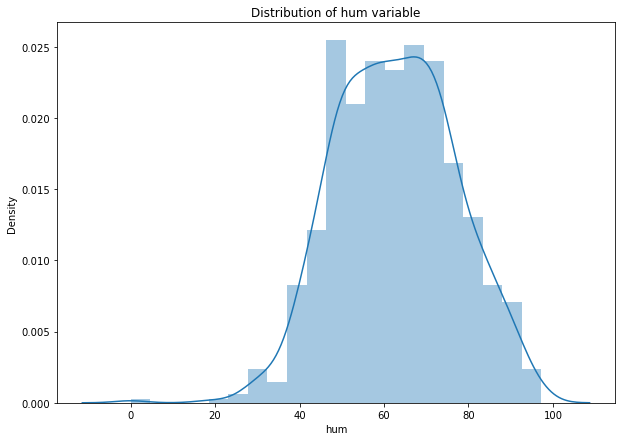

In [17]:
plt.figure(figsize= (10,7))
sns.distplot(bk_sharing_data.hum)
plt.title("Distribution of hum variable")
plt.show()

**Observations**: It is following a normal distribution.

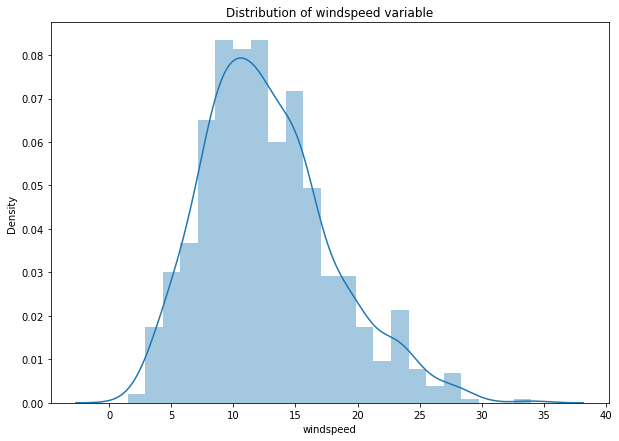

In [18]:
plt.figure(figsize= (10, 7))
sns.distplot(bk_sharing_data.windspeed)
plt.title("Distribution of windspeed variable")
plt.show()

**Observations**: It is a right skewed distribution

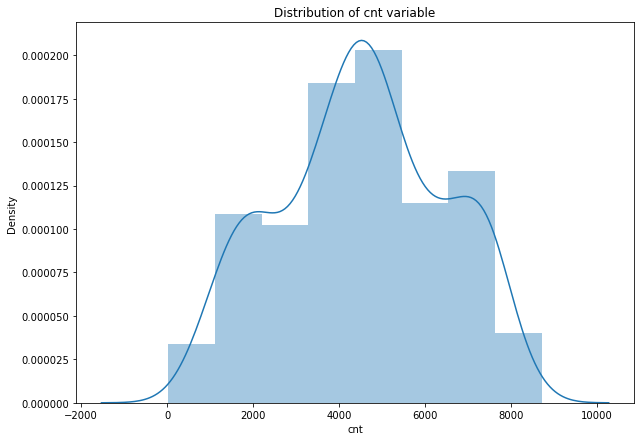

In [19]:
plt.figure(figsize= (10,7))
sns.distplot(bk_sharing_data.cnt, bins = 8)
plt.title("Distribution of cnt variable")
plt.show()

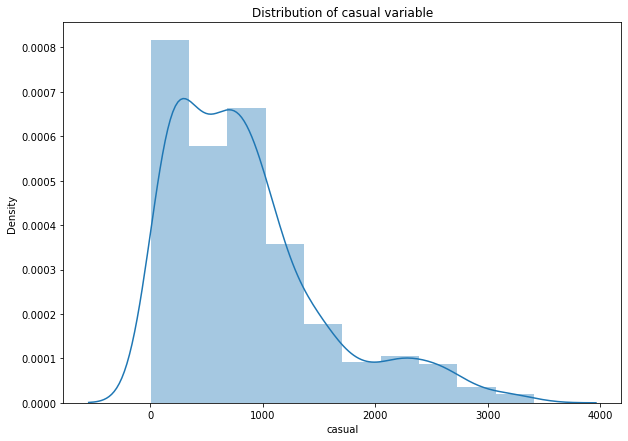

In [20]:
plt.figure(figsize= (10, 7))
sns.distplot(bk_sharing_data.casual, bins = 10)
plt.title("Distribution of casual variable")
plt.show()

**Observations** This is a right skewed distriution. This indicates that majority of the times, we could expect less number of casual users.

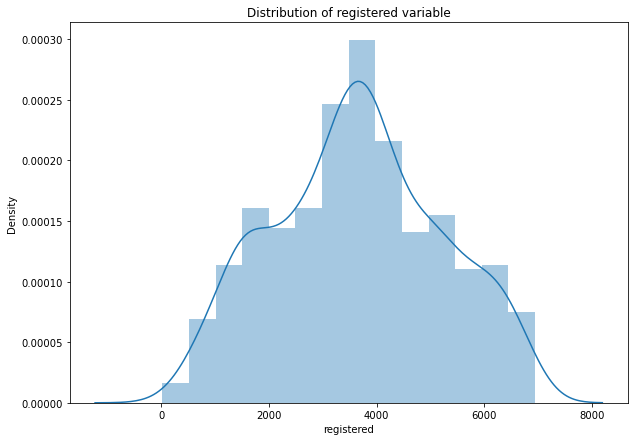

In [21]:
plt.figure(figsize= (10,7))
sns.distplot(bk_sharing_data.registered)
plt.title("Distribution of registered variable")
plt.show()

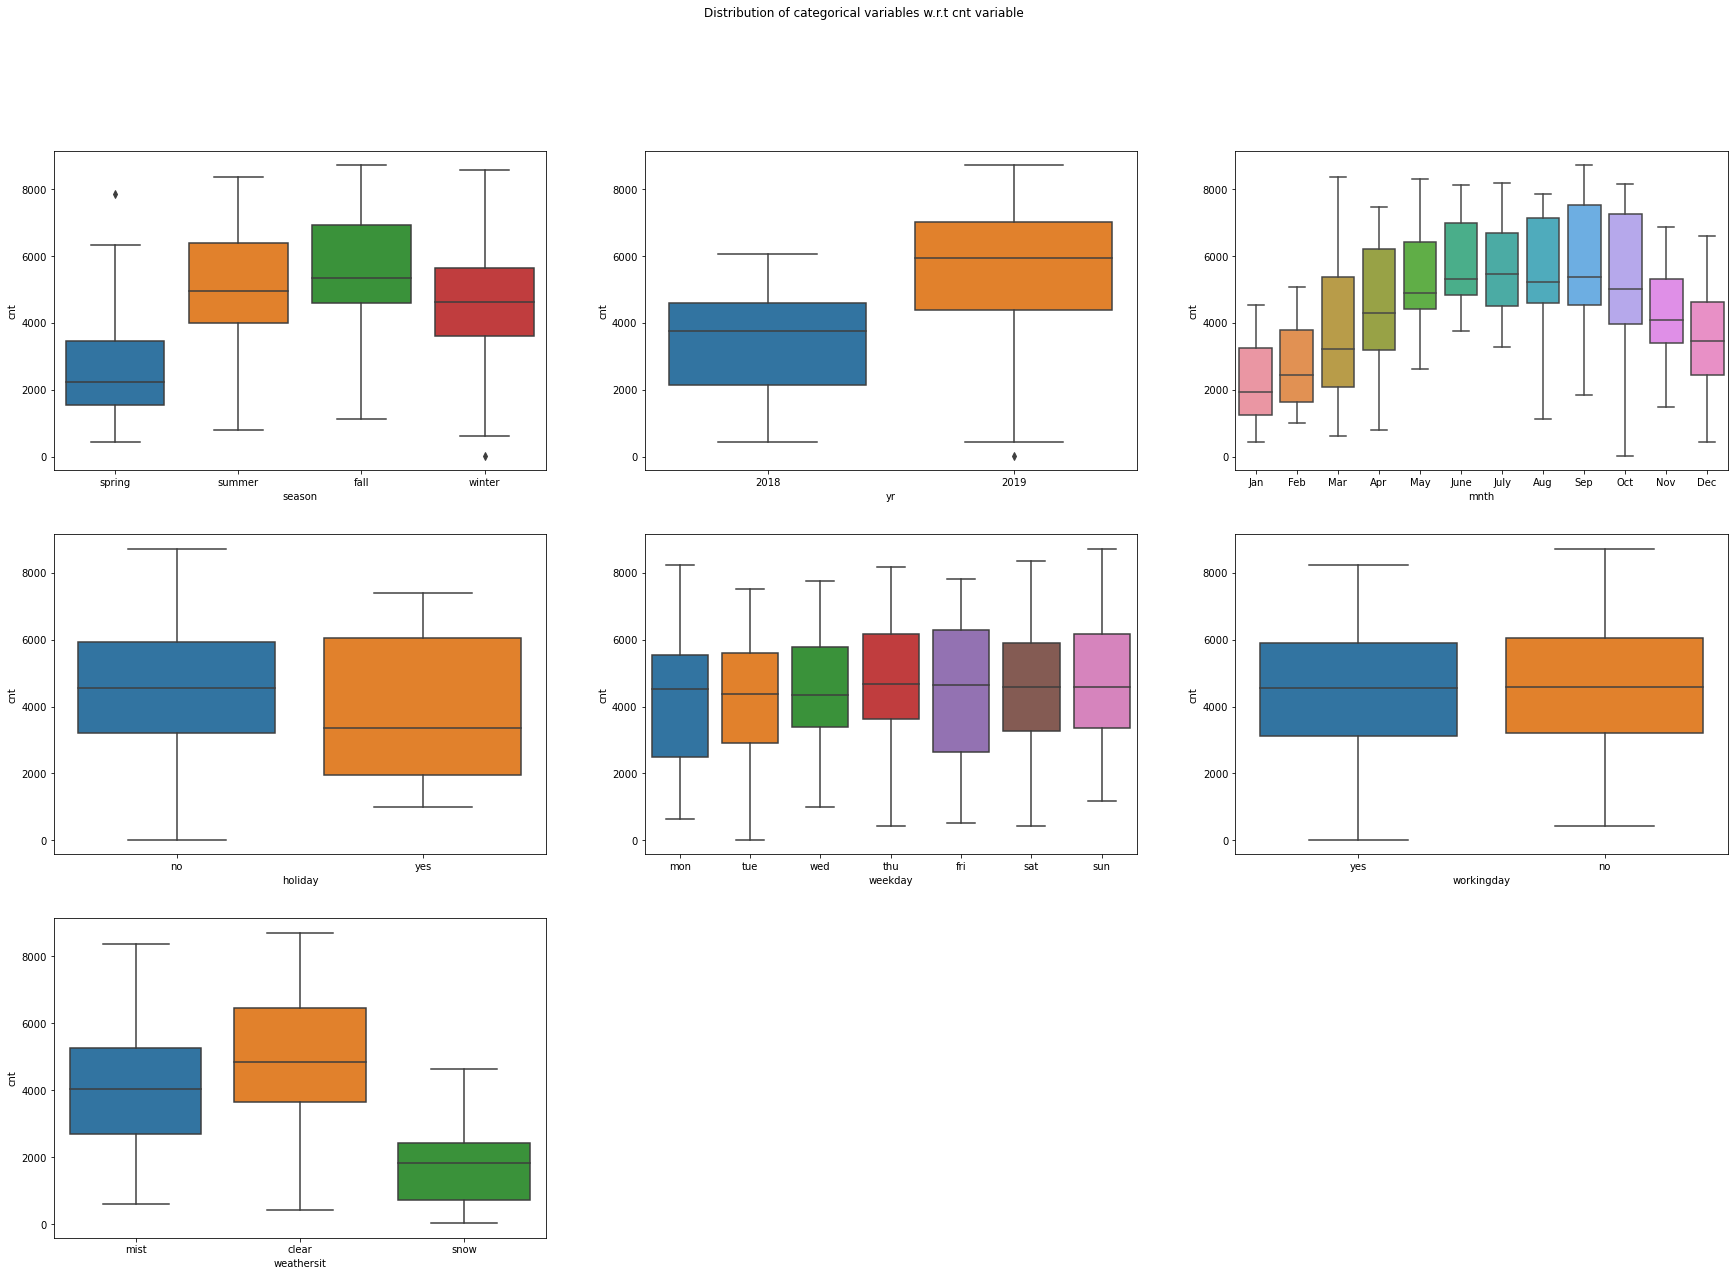

In [22]:
## Use Boxplot to plot the categorical data.
plt.figure(figsize= (30, 20))
plt.title("Distribution of categorical variables w.r.t cnt variable")
plt.subplot(3,3,1)
sns.boxplot(x = "season", y = "cnt", data = bk_sharing_data)

plt.subplot(3,3,2)
sns.boxplot(x = "yr", y = "cnt", data = bk_sharing_data)


plt.subplot(3,3,3)
sns.boxplot(x = "mnth", y = "cnt", data = bk_sharing_data)


plt.subplot(3,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = bk_sharing_data)


plt.subplot(3,3,5)
sns.boxplot(x = "weekday", y = "cnt", data = bk_sharing_data)


plt.subplot(3,3,6)
sns.boxplot(x = "workingday", y = "cnt", data = bk_sharing_data)


plt.subplot(3,3,7)
sns.boxplot(x = "weathersit", y = "cnt", data = bk_sharing_data)

plt.suptitle("Distribution of categorical variables w.r.t cnt variable")
plt.show()

**Observations**
- the median is almost same for all the days of weekday / weekend.
- For the **weathersit**, it is expected to see less population on snowy days.
- We could see the demand for the bikes has gone up during the months April to October. The sme can be seen with the distribution of season.
- Significant increase in the demand is observed in 2019 ( compared to 2018).
- It has been seen that there is a significant decrease in the usage of bikes during the holidays.

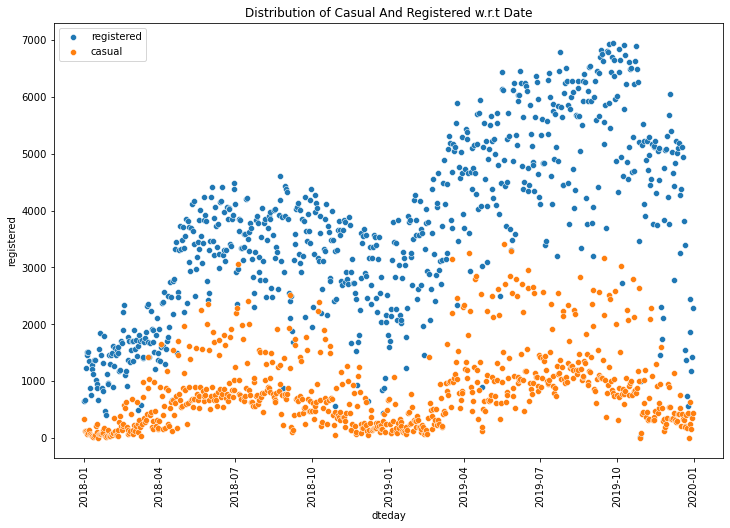

In [23]:
fig = plt.figure(figsize= (12,8))
sns.scatterplot(bk_sharing_data.dteday, bk_sharing_data.registered, label = "registered")
sns.scatterplot(bk_sharing_data.dteday, bk_sharing_data.casual, label = "casual")
plt.title("Distribution of Casual And Registered w.r.t Date")
plt.xticks(rotation=90)
plt.show()

**Observations** 
- On a regular basis, it is expected to see a higher number of registered users compared to casual users.
- Also, as time increases, we can see a significant increase in the demand of the bikes.
- During the snowy seasons, we could see a significant decrease in the demand.

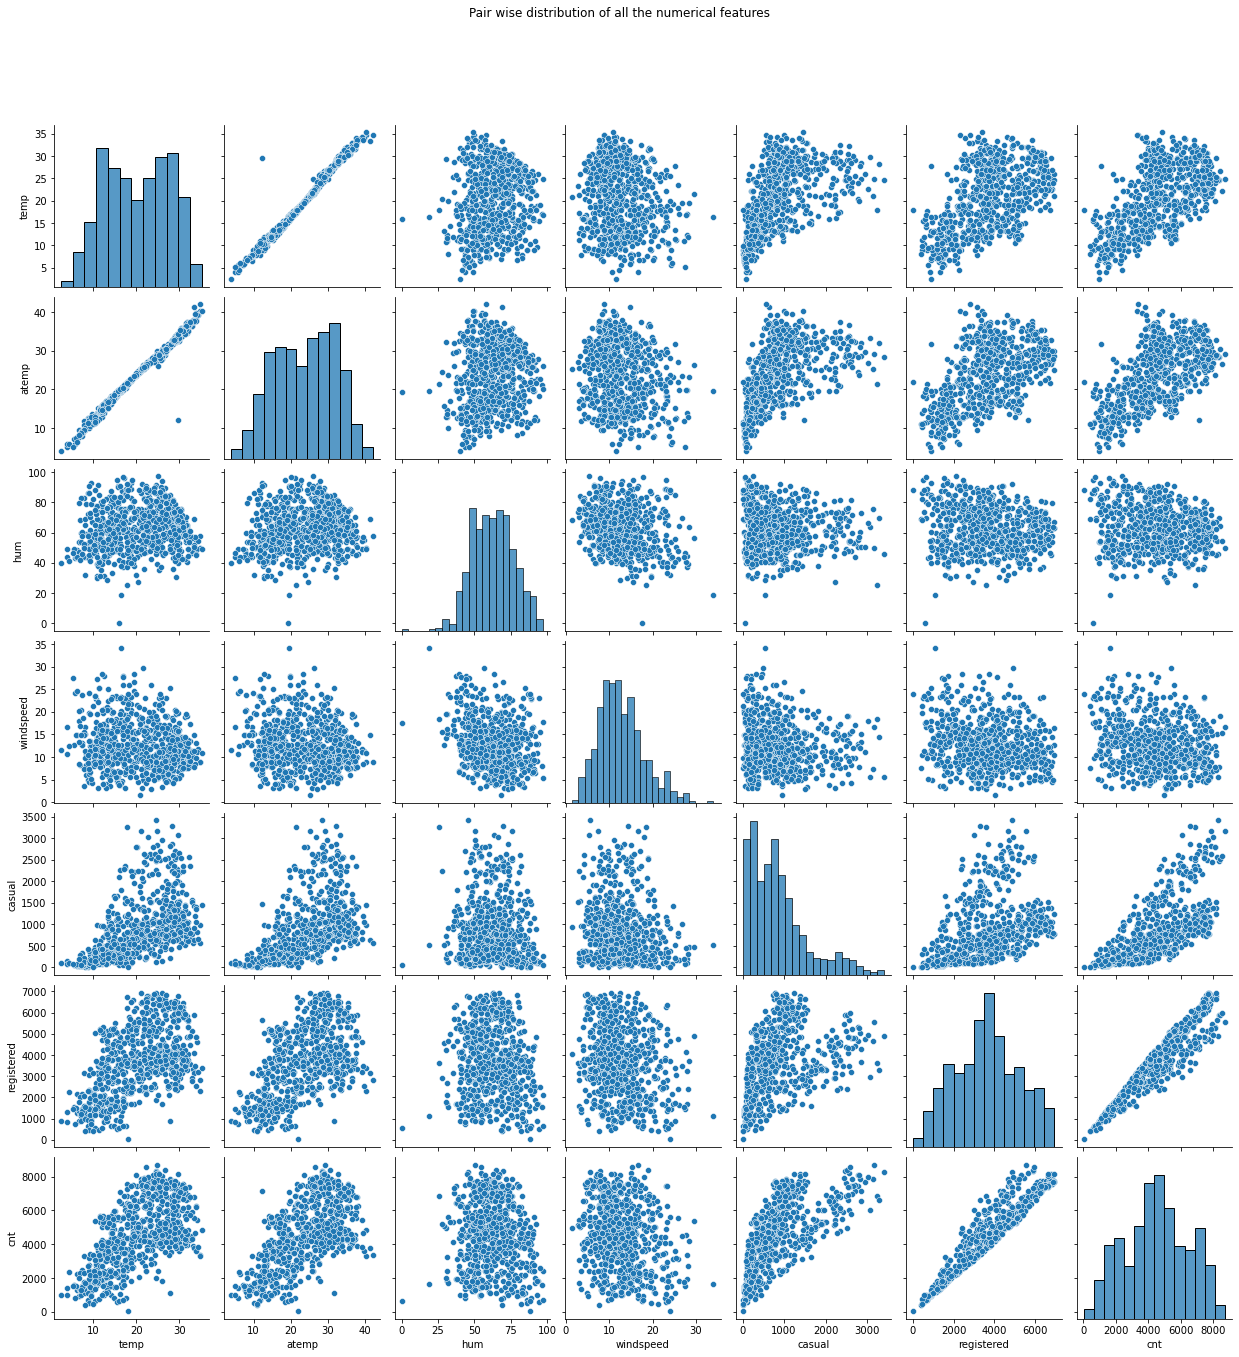

In [24]:
sns.pairplot(bk_sharing_data)
plt.suptitle("Pair wise distribution of all the numerical features", y=1.08)
plt.show()

**Observations**
- temp and atemp are multi-collinear.
- temp and atemp variables seems to have positive correlation with cnt.
- windspeed, and hum - have negative relationship with cnt of users

In [25]:
## Select integer columns
Int_vars = bk_sharing_data.select_dtypes(include= (int, float)).columns

corr = bk_sharing_data[Int_vars].corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


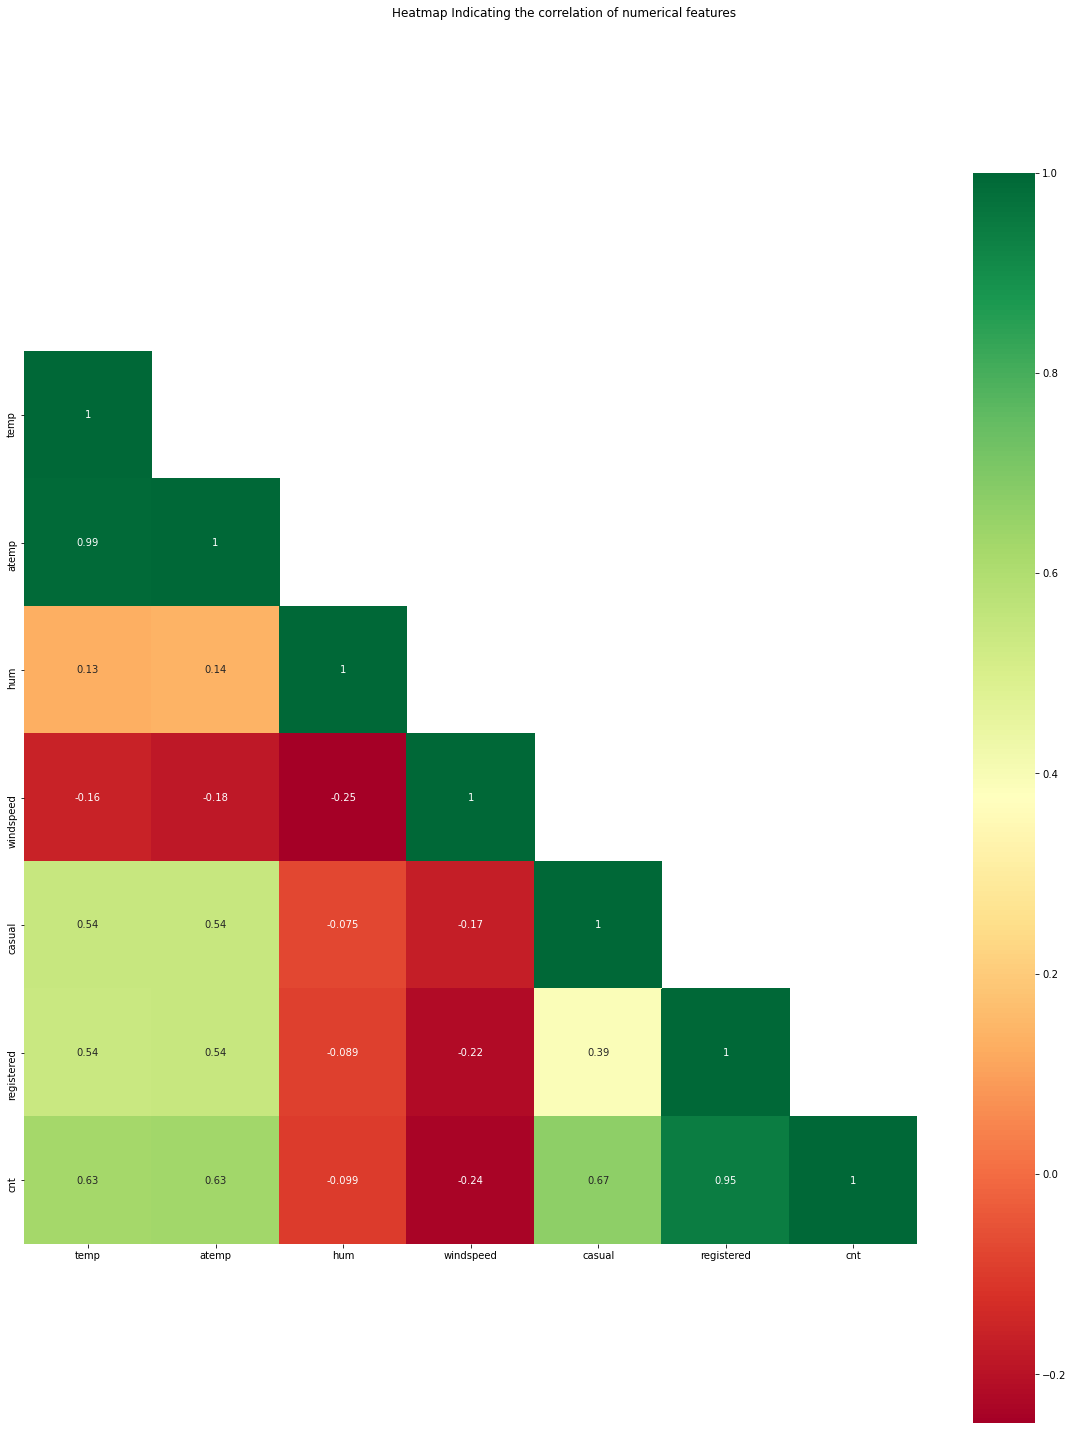

In [26]:
### get correlations and draw the heatmap
# store correlations in the variable mask
mask = np.array(corr)
mask[np.tril_indices_from ( mask)] = False
# triu_indices_from(mask)

plt.figure(figsize= (20,23))
plt.suptitle("Heatmap Indicating the correlation of numerical features")
sns.heatmap(corr, mask = mask, square = True, annot=True, cmap = 'RdYlGn')
plt.show()

### Data Preparation:


In [27]:
#consider columns with between -0.7 and 0.7. Rest of the columns, drop them
corr[ (corr > 0.7) |(corr < -0.7)]

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,NaN,NaN,NaN,NaN,NaN
atemp,0.991696,1.000000,NaN,NaN,NaN,NaN,NaN
hum,NaN,NaN,1.0,NaN,NaN,NaN,NaN
windspeed,NaN,NaN,NaN,1.0,NaN,NaN,NaN
casual,NaN,NaN,NaN,NaN,1.0,NaN,NaN
registered,NaN,NaN,NaN,NaN,NaN,1.000000,0.945411
cnt,NaN,NaN,NaN,NaN,NaN,0.945411,1.000000


In [28]:
bk_sharing_data.drop("atemp", axis =1, inplace = True)

In [29]:
## Dropping unnecesary columns
bk_sharing_data.drop("casual", axis =1, inplace = True)
bk_sharing_data.drop("registered", axis =1, inplace = True)

# Since workingday is highly related to weekday, removing the same.
bk_sharing_data.drop("workingday", axis =1, inplace = True)

bk_sharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [30]:
#bk_sharing_data["date"] = bk_sharing_data["dteday"].dt.day
bk_sharing_data.drop("dteday", axis =1, inplace = True)

In [31]:
#getting the data of all the categorical columns
cat_data = bk_sharing_data.select_dtypes(include= "object")
cat_data

,season,yr,mnth,holiday,weekday,weathersit
instant,,,,,,
1,spring,2018,Jan,no,mon,mist
2,spring,2018,Jan,no,tue,mist
3,spring,2018,Jan,no,wed,clear
4,spring,2018,Jan,no,thu,clear
5,spring,2018,Jan,no,fri,clear
...,...,...,...,...,...,...
726,spring,2019,Dec,no,fri,mist
727,spring,2019,Dec,no,sat,mist
728,spring,2019,Dec,no,sun,mist


### Creating Dummy Variables

In [32]:
### Do One-hot encoding
#Season, yr, month, holiday, workingday, weekday, weathersit
df_dummies = pd.get_dummies(cat_data, drop_first= True) 
df_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,...,mnth_Sep,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# drop cat columns from original cols
bk_sharing_data = bk_sharing_data.drop(cat_data.columns, axis = 1)
bk_sharing_data = pd.concat([bk_sharing_data, df_dummies], axis = 1)

#df_dummies = pd.get_dummies(cat_data, columns = [], drop_first= True) 

In [34]:
# Divide the data into x and y.
x = bk_sharing_data.drop("cnt", axis = 1)
y = bk_sharing_data["cnt"]

In [35]:
x.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
instant,,,,,,,,,,,,,,,,,,,,,
1,14.110847,80.5833,10.749882,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,14.902598,69.6087,16.652113,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,8.050924,43.7273,16.636703,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8.200000,59.0435,10.739832,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,9.305237,43.6957,12.522300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y.head()

instant
1     985
2     801
3    1349
4    1562
5    1600
Name: cnt, dtype: int64

### Splitting the data

In [37]:
### Dividing the data into two sets - train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 0) 

In [38]:
X_train.shape

(584, 27)

### Scaling Numerical Data

In [39]:
num_feats = list(X_train.describe().columns)
len(num_feats)

27

In [40]:
### Scaling the numerical data to fit a normal distribution
sc = MinMaxScaler()
X_train[num_feats] = sc.fit_transform( X_train[num_feats])
X_test[num_feats] = sc.transform( X_test[num_feats])

In [41]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
instant,,,,,,,,,,,,,,,,,,,,,
240,0.807351,0.428211,0.657105,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,0.344785,0.810325,0.462577,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
504,0.673950,0.281322,0.104370,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
643,0.692641,0.519721,0.160412,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.640722,0.745359,0.426760,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Fitting Regression Model

In [42]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [43]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
instant,,,,,,,,,,,,,,,,,,,,,
240,0.807351,0.428211,0.657105,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,0.344785,0.810325,0.462577,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
504,0.673950,0.281322,0.104370,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
643,0.692641,0.519721,0.160412,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.640722,0.745359,0.426760,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Checking Intercepts and Co-efficients

In [44]:
pd.DataFrame( regression.coef_, x.columns, columns = ["Coefficients"])

,Coefficients
temp,3834.493258
hum,-1286.915499
windspeed,-1247.084518
season_spring,-808.790828
season_summer,55.220813
season_winter,642.052205
yr_2019,1935.403911
mnth_Aug,-140.072399
mnth_Dec,-439.724546
mnth_Feb,-318.591727


In [45]:
regression.intercept_

2968.556294356247

### Evaluating model

In [46]:
y_test_pred = regression.predict(X_test)
y_train_pred = regression.predict(X_train)

In [47]:
pd.DataFrame({"Actual": y_test,"Predicted": y_test_pred})

,Actual,Predicted
instant,,
197,5923,4052.725975
188,4592,4693.795836
15,1248,1131.856257
32,1360,1038.236083
391,4075,3667.477206
...,...,...
119,4595,4376.739921
567,4459,3648.988616
689,5634,5116.158450


In [48]:
print("Test prediction score is ", round(r2_score(y_test_pred, y_test)* 100, 2))

Test prediction score is  82.97


In [49]:
print("Train prediction score is ", round(r2_score(y_train_pred, y_train) * 100, 2))

Train prediction score is  80.51


**Observations**: There is not much difference in the R2 Score for the test and train data sets. This is a good model.
But using RFE to improve this further.

### Recursive Feature elimination

In [50]:
regression = LinearRegression()
#regression.fit(X_train, y_train)

In [51]:
rfe = RFE(regression, 21)             # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]

In [52]:
### Extracting the columns selected by RFE.
X_train_rfe = X_train[col]
X_train_rfe

,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_June,mnth_May,mnth_Nov,mnth_Sep,holiday_yes,weekday_mon,weekday_sun,weekday_tue,weathersit_mist,weathersit_snow
instant,,,,,,,,,,,,,,,,,,,,,
240,0.807351,0.428211,0.657105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,0.344785,0.810325,0.462577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
504,0.673950,0.281322,0.104370,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
643,0.692641,0.519721,0.160412,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.640722,0.745359,0.426760,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,0.405012,0.906613,0.289714,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
193,0.915892,0.424594,0.395608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
630,0.736253,0.546404,0.604317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
### Displaying the columns, and the ranking order of RFE
list(zip( X_train.columns, rfe.support_, rfe.ranking_))


[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', True, 1),
 ('mnth_Mar', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 3),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 7),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 2),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [54]:
### VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [55]:
X_train_rfe1 = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.45e-205
Time:                        23:42:40   Log-Likelihood:                -4706.3
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     562   BIC:                             9553.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3087.3120    234.238     

In [56]:
checkVIF(X_train_rfe1)

,Features,VIF
0,const,52.70
1,temp,6.94
4,season_spring,4.02
5,season_winter,2.98
11,mnth_July,2.96
7,mnth_Aug,2.57
12,mnth_June,2.50
10,mnth_Jan,2.36
2,hum,2.28
9,mnth_Feb,1.96


In [57]:
### Removing Variable workingday_yes as it has higher VIF 
X_train_rfe1.drop("mnth_June", axis = 1, inplace = True)

X_train_rfe1

,const,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_July,mnth_May,mnth_Nov,mnth_Sep,holiday_yes,weekday_mon,weekday_sun,weekday_tue,weathersit_mist,weathersit_snow
instant,,,,,,,,,,,,,,,,,,,,,
240,1.0,0.807351,0.428211,0.657105,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,1.0,0.344785,0.810325,0.462577,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
504,1.0,0.673950,0.281322,0.104370,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
643,1.0,0.692641,0.519721,0.160412,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,1.0,0.640722,0.745359,0.426760,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,1.0,0.405012,0.906613,0.289714,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
193,1.0,0.915892,0.424594,0.395608,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
630,1.0,0.736253,0.546404,0.604317,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
X_train_rfe2 = build_model(X_train_rfe1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     143.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          7.79e-206
Time:                        23:42:40   Log-Likelihood:                -4706.7
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     563   BIC:                             9547.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3116.5682    231.801     

In [59]:
checkVIF(X_train_rfe2)

,Features,VIF
0,const,51.63
1,temp,4.34
4,season_spring,3.88
5,season_winter,2.60
10,mnth_Jan,2.23
2,hum,2.18
9,mnth_Feb,1.93
13,mnth_Nov,1.77
11,mnth_July,1.69
19,weathersit_mist,1.67


In [60]:
### Removing Variable season_summer
X_train_rfe2.drop("mnth_Aug", axis = 1, inplace = True)

In [61]:
X_train_rfe3 = build_model(X_train_rfe2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.96e-207
Time:                        23:42:40   Log-Likelihood:                -4707.0
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     564   BIC:                             9541.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3141.5613    229.880     

In [62]:
checkVIF(X_train_rfe3)

,Features,VIF
0,const,50.81
4,season_spring,3.86
1,temp,3.73
5,season_winter,2.49
9,mnth_Jan,2.19
2,hum,2.18
8,mnth_Feb,1.92
12,mnth_Nov,1.76
18,weathersit_mist,1.67
7,mnth_Dec,1.60


In [63]:
#weekday_sun
X_train_rfe3.drop("weekday_sun", axis = 1, inplace = True)

In [64]:
X_train_rfe4 = build_model(X_train_rfe2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.96e-207
Time:                        23:42:40   Log-Likelihood:                -4707.0
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     564   BIC:                             9541.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3141.5613    229.880     

In [65]:
checkVIF(X_train_rfe2)

,Features,VIF
0,const,50.81
4,season_spring,3.86
1,temp,3.73
5,season_winter,2.49
9,mnth_Jan,2.19
2,hum,2.18
8,mnth_Feb,1.92
12,mnth_Nov,1.76
18,weathersit_mist,1.67
7,mnth_Dec,1.60


In [66]:
# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_rfe2).fit()

In [67]:
lr4.params


const              3141.561310
temp               3524.667836
hum               -1259.113714
windspeed         -1231.190343
season_spring      -765.741354
season_winter       694.638651
yr_2019            1948.182328
mnth_Dec           -559.079842
mnth_Feb           -445.116161
mnth_Jan           -598.227235
mnth_July          -506.853644
mnth_May            308.818600
mnth_Nov           -647.261655
mnth_Sep            533.399292
holiday_yes        -482.071311
weekday_mon        -231.131564
weekday_sun         151.205097
weekday_tue        -216.762375
weathersit_mist    -417.518168
weathersit_snow   -1758.391032
dtype: float64

In [68]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.96e-207
Time:                        23:42:40   Log-Likelihood:                -4707.0
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     564   BIC:                             9541.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3141.5613    229.880     

### Final Model Interpretation


**Hypothesis Testing** In Hypothesis testing, we assume that 

- H0:B1=B2=...=Bn=0
- H1: at least one Bi!=0

**Model Co-efficient Values:** Co-efficients values of the models are 

In [69]:
lr4.params

const              3141.561310
temp               3524.667836
hum               -1259.113714
windspeed         -1231.190343
season_spring      -765.741354
season_winter       694.638651
yr_2019            1948.182328
mnth_Dec           -559.079842
mnth_Feb           -445.116161
mnth_Jan           -598.227235
mnth_July          -506.853644
mnth_May            308.818600
mnth_Nov           -647.261655
mnth_Sep            533.399292
holiday_yes        -482.071311
weekday_mon        -231.131564
weekday_sun         151.205097
weekday_tue        -216.762375
weathersit_mist    -417.518168
weathersit_snow   -1758.391032
dtype: float64

**Insights**: From the summary, we can observe that the cofficients of the model are not 0. Hence, we reject the null hypothesis

**Equation of the line:** The equation of the line is <br>
cnt = const* 3141.561310 + temp * 3524.667836 + hum * -1259.113714 + windspeed *   -1231.190343 + season_spring * -765.741354 + season_winter * 694.638651 + yr_2019 * 1948.182328 + mnth_Dec * -559.079842 + mnth_Feb * -445.116161 + mnth_Jan * -598.227235 + mnth_July * -506.853644 + mnth_May * 308.818600 + mnth_Nov * -647.261655 + mnth_Sep * 533.399292 + holiday_yes * -482.071311 + weekday_mon *  -231.131564 + weekday_sun *   151.205097 + weekday_tue *  -216.762375 + weathersit_mist * -417.518168 + weathersit_snow *  -1758.391032

**Interpretation:** <br>
- From the EDA, we could see that the temp is positively correlated with cnt variable. The same can be explained from the co-efficients
- Hum and windspeed are negatively correlated ( can be explained by negative co-efficients).
- During the holidays, a significant decrease in the demand was observed ( in EDA and scaling factors).
- During 2019, a significant increase in the demand is noted.

**Assumptions**
1. Checking that the error terms are normally distributed.

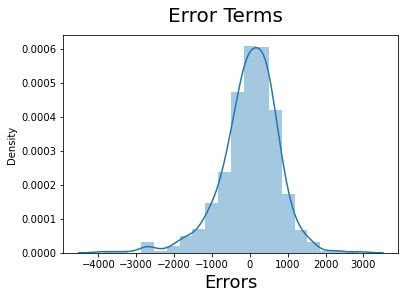

In [70]:
y_train_pred = lr4.predict(X_train_rfe2)
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

<AxesSubplot:>

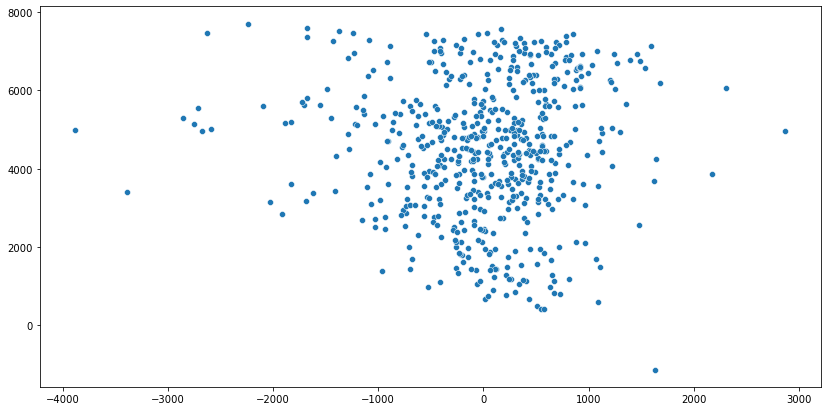

In [71]:
plt.figure(figsize=(14,7))
sns.scatterplot(res, y_train_pred)

2. No multi-collinearity between predictor variables:
 

In [72]:
checkVIF(X_train_rfe2)

,Features,VIF
0,const,50.81
4,season_spring,3.86
1,temp,3.73
5,season_winter,2.49
9,mnth_Jan,2.19
2,hum,2.18
8,mnth_Feb,1.92
12,mnth_Nov,1.76
18,weathersit_mist,1.67
7,mnth_Dec,1.60


### Checking the accuracy of the model:

In [73]:
col = X_train_rfe2.columns
X_test = sm.add_constant(X_test) #Adding the constant
X_test = X_test[col]

In [74]:
y_test_pred = lr4.predict(X_test)
y_train_pred = lr4.predict(X_train_rfe2)
print("R Squared for training data is ", round(r2_score(y_train_pred, y_train)* 100, 2))
print("R Squared for testing data is ", round(r2_score(y_test_pred, y_test)*100, 2))


R Squared for training data is  80.34
R Squared for testing data is  83.49


In [75]:
r2 = r2_score(y_test_pred, y_test)
r2

0.8348569338913169

In [76]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8084340433139277

**Final Results:**
- R2 for training data - 80.34
- R2 for test data - 83.49
- Adjusted R2 - 80.1
